## Keras dense layers

First, lets import the library folder of the virtual environment. This allow us to work inside this notebook.

In [1]:
import sys
import os
sys.path.append(os.getcwd()+'/venv/lib/python3.6/site-packages/')

#### Loading data

In [2]:
import pandas as pd

datafile = {'pasivos': 'data/pasivos.csv','detractores': 'data/detractores.csv'}

df_list = []
for data, file in datafile.items():
    df = pd.read_csv(file)
    df['class'] = data
    df_list.append(df.fillna(0))


#### Output categories

In [3]:
categories = ['servicio ripley','mayor saldo','falta informacion',
           'aumentar cant trans','performance','formas de carga',
           'usabilidad','puntos ripley','cumplir promociones',
           'mejorar beneficios','premiar app','nuevo',
           'atencion al cliente','seguridad','transacciones diarias',
           'datos usuario','huawei']

for data in df_list:
    for cat in categories:
        data[cat] = pd.to_numeric(data[cat])

#### Plotting data for each category

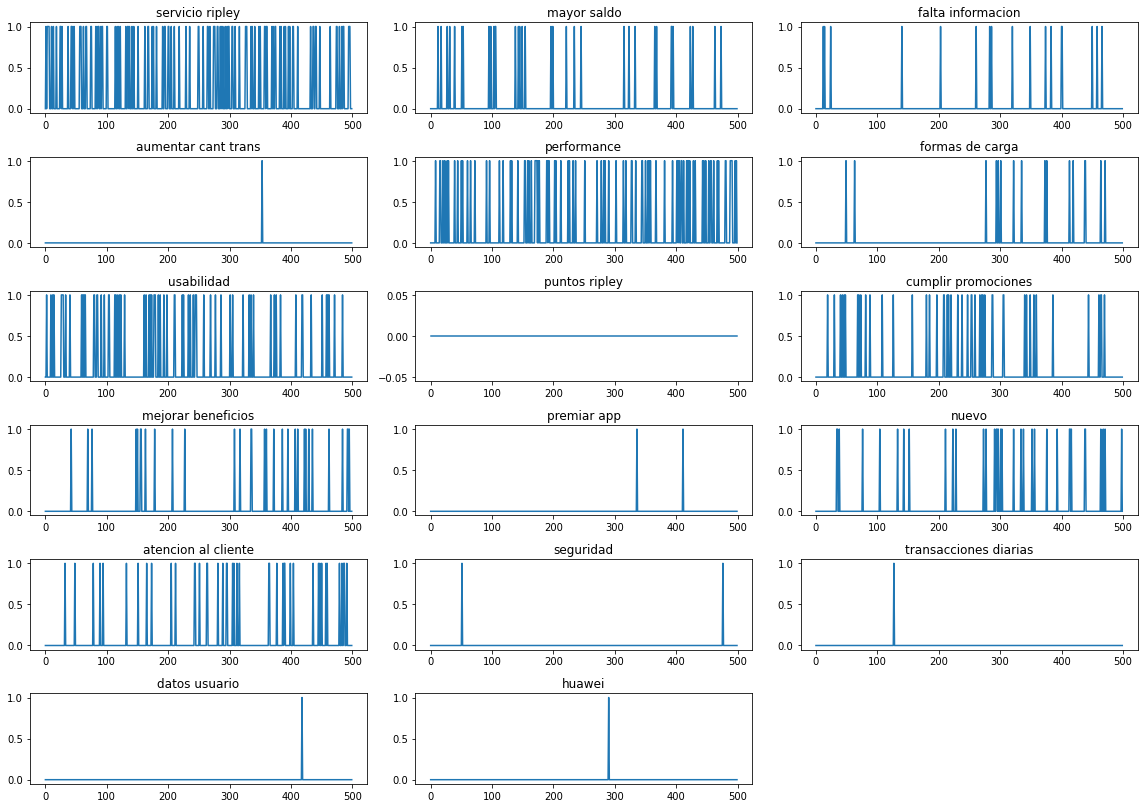

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(int(np.ceil(len(categories)/3)),3,figsize=(16,2*len(categories)/3))

for i,cat in enumerate(categories):
    if (data[cat] == None).any():
        print('fuck')
    axs[int(i/3)][i%3].plot(range(len(data[cat])),data[cat])
    axs[int(i/3)][i%3].set_title(cat)
    
fig.delaxes(axs[-1][-1])
plt.tight_layout()

#### Performing logistic regression over each data
Separates data in train and test.
During the process, the texts are vectorized using a bag of words approach.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 
vectorizer.fit(data['texto'])

data = df_list[0] # uses only 'pasivos' to construct each model
secondaryTestData = df_list[1]
isSecData = type(secondaryTestData) == pd.core.frame.DataFrame

if isSecData:
    secTest = vectorizer.transform(secondaryTestData['texto'])

exp = []
for cat in categories:
    print('\n--> '+cat,)
    if (data[cat]==0).all() or sum(data[cat]) <= 1:
        print('**\tNot enough data\t**')
        continue
    
    text_tr, text_te, y_tr, y_te = train_test_split(data['texto'], data[cat], test_size=0.25, random_state=1000)
    
    exp.append( {'exp'   : cat, 
                 'itrain': vectorizer.transform(text_tr), 
                 'itest' : vectorizer.transform(text_te),
                 'otrain': y_tr, 
                 'otest' : y_te,
                })



--> servicio ripley

--> mayor saldo

--> falta informacion

--> aumentar cant trans

--> performance

--> formas de carga

--> usabilidad

--> puntos ripley

--> cumplir promociones

--> mejorar beneficios

--> premiar app

--> nuevo

--> atencion al cliente

--> seguridad

--> transacciones diarias

--> datos usuario

--> huawei
**	Not enough data	**


#### Running keras

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

nExp = str(len(exp))

for i,e in enumerate(exp):
    iDim = e['itrain'].shape[1]
    model = Sequential(name = str(i)+'/'+nExp+' - '+e['exp'])
    model.add(layers.Dense(10,input_dim=iDim, activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    e['model'] = model
    
    e['history'] = e['model'].fit(e['itrain'], 
                                  e['otrain'],
                                  epochs=100,
                                  verbose=False,
                                  validation_data=(e['itest'], e['otest']),
                                  batch_size=10)
    

/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cristobal/

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "servicio ripley"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                18590     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 18,601
Trainable params: 18,601
Non-trainable params: 0
_________________________________________________________________
Model: "mayor saldo"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                18590     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 18,601
Trainable params: 18,601
Non-trainable para

Model: "seguridad"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                18590     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 18,601
Trainable params: 18,601
Non-trainable params: 0
_________________________________________________________________
Model: "transacciones diarias"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                18590     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 18,601
Trainable params: 18,601
Non-trainable params: 0
_________________________________________________________________
Model: "datos usua

##### Evaluating model

In [17]:
from sklearn.metrics import confusion_matrix

def evaluateModel(iDict,sDict,iData,oData,threshold=0.5):
    sDict['prediction']  = [val[0] > threshold for val in iDict['model'].predict(iData)]
    sDict['truth']       = oData
    sDict['confusion']   = confusion_matrix(sDict['truth'],sDict['prediction'])
    
    if len(sDict['confusion']) > 1:
        sDict['tp']             = sDict['confusion'][1][1]
        sDict['tn']             = sDict['confusion'][0][0]
        sDict['fp']             = sDict['confusion'][0][1]
        sDict['fn']             = sDict['confusion'][1][0]
        sDict['N' ]             = np.sum(sDict['confusion'])
        
        sDict['accuracy' ] = (sDict['tn']+sDict['tp']) / sDict['N']
        sDict['precision'] = sDict['tp'] / (sDict['tp']+sDict['fp'])
        sDict['recall'   ] = sDict['tp'] / (sDict['tp']+sDict['fn'])
    
        print('Accuracy:',sDict['accuracy'])
        print('Precision:',sDict['precision'])
        print('Recall:',sDict['recall'])

for e in exp:    
    print(e['exp'])
    evaluateModel(e,e,e['itest'],e['otest'])
    
    if isSecData:
        e['secondaryTest'] = {}
        evaluateModel(e,e['secondaryTest'],secTest,secondaryTestData[e['exp']])
        


servicio ripley
Accuracy: 0.8780487804878049
Precision: 0.75
Recall: 0.6666666666666666
Accuracy: 0.812
Precision: 0.6435643564356436
Recall: 0.5284552845528455
mayor saldo
Accuracy: 0.9146341463414634
Precision: 0.625
Recall: 0.5555555555555556
Accuracy: 0.95
Precision: 0.7368421052631579
Recall: 0.4117647058823529
falta informacion
Accuracy: 0.9512195121951219
Precision: nan
Recall: 0.0
Accuracy: 0.954
Precision: 0.0
Recall: 0.0
aumentar cant trans
Accuracy: 0.998
Precision: nan
Recall: 0.0
performance
Accuracy: 0.8414634146341463
Precision: 0.6666666666666666
Recall: 0.5555555555555556
Accuracy: 0.782
Precision: 0.41935483870967744
Recall: 0.4148936170212766
formas de carga
Accuracy: 0.9878048780487805
Precision: 0.0
Recall: nan
Accuracy: 0.968
Precision: nan
Recall: 0.0
usabilidad


/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


Accuracy: 0.8292682926829268
Precision: 0.5
Recall: 0.21428571428571427
Accuracy: 0.87
Precision: 0.6956521739130435
Recall: 0.21621621621621623
puntos ripley
cumplir promociones
Accuracy: 0.9878048780487805
Precision: nan
Recall: 0.0
Accuracy: 0.912
Precision: 1.0
Recall: 0.06382978723404255
mejorar beneficios
Accuracy: 0.8170731707317073
Precision: 0.6111111111111112
Recall: 0.5789473684210527
Accuracy: 0.872
Precision: 0.18867924528301888
Recall: 0.3225806451612903
premiar app
Accuracy: 0.9024390243902439
Precision: 0.4
Recall: 0.6666666666666666
Accuracy: 0.962
Precision: 0.0
Recall: 0.0
nuevo
Accuracy: 0.9146341463414634
Precision: 0.7142857142857143
Recall: 0.5
Accuracy: 0.914
Precision: 0.38235294117647056
Recall: 0.37142857142857144
atencion al cliente
Accuracy: 0.9634146341463414
Precision: nan
Recall: 0.0
Accuracy: 0.908
Precision: 0.38461538461538464
Recall: 0.11627906976744186
seguridad
Accuracy: 0.975609756097561
Precision: nan
Recall: 0.0
Accuracy: 0.996
Precision: nan
Re

/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


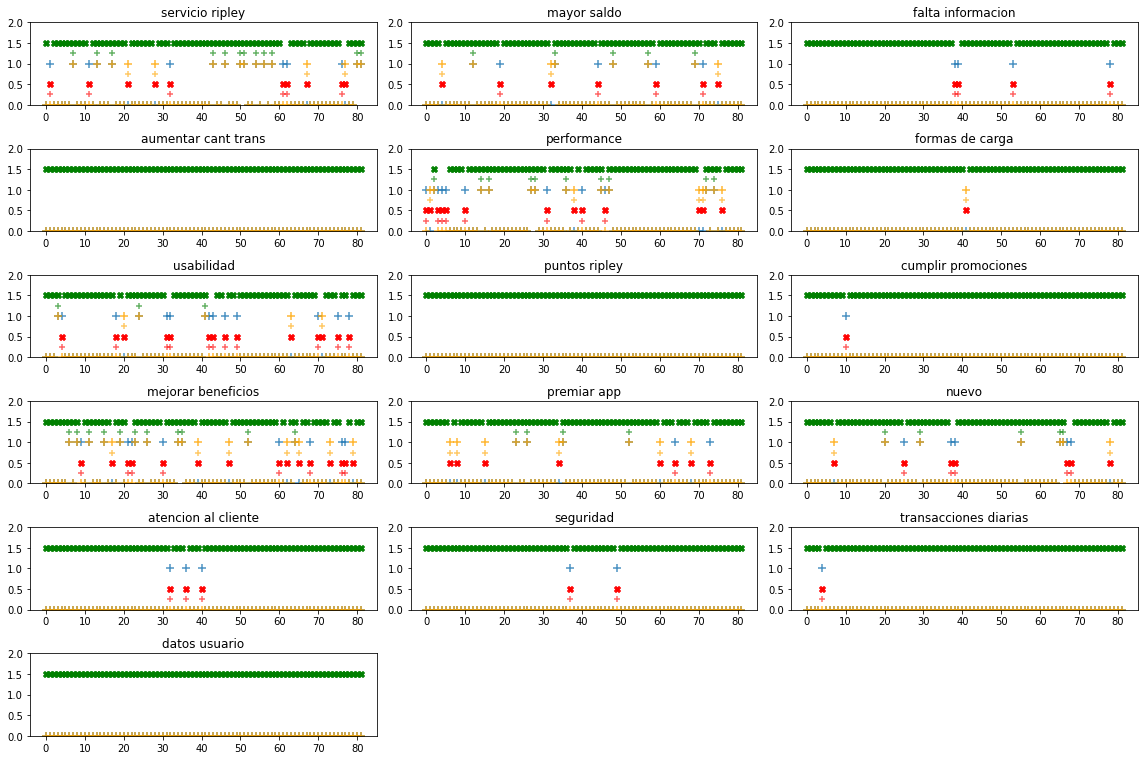

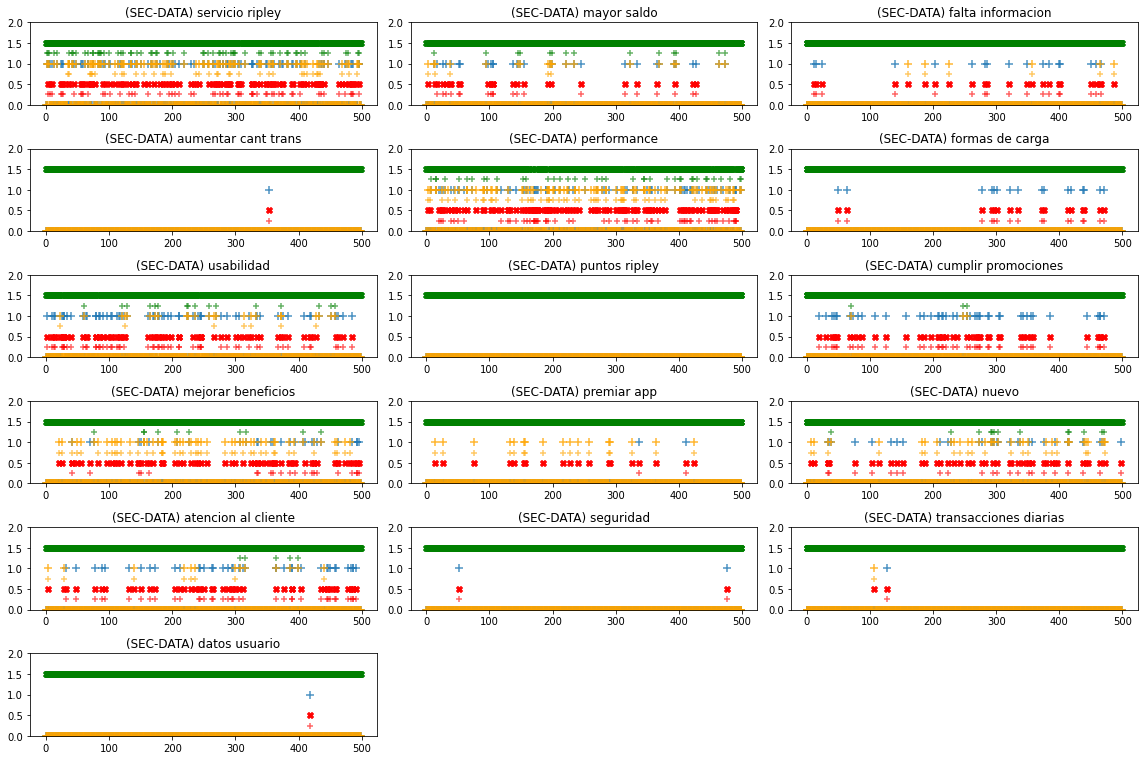

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def singlePrediction(axs,data,name):
    xPos = range(len(data['prediction']))
    axs.scatter(xPos,data['truth'],marker='+',alpha=.8,s=80)
    axs.scatter(xPos,data['prediction'], facecolor='orange', marker='+',alpha=.8,s=80)
    axs.scatter(xPos,2*(data['truth'] == data['prediction'])-.5, facecolor='g', marker='X')
    axs.scatter(xPos,1.5*(data['truth'] * data['prediction'])-.25, facecolor='g', marker='+',alpha=.6)
    axs.scatter(xPos,0.5*(data['truth'] > data['prediction'])-.25, facecolor='r', marker='+',alpha=.6)
    axs.scatter(xPos,1.0*(data['truth'] < data['prediction'])-.25, facecolor='orange', marker='+',alpha=.6)
    dPos = np.array(data['truth'] != data['prediction'],dtype='int')
    axs.scatter(xPos,dPos-0.5, facecolor='r', marker='X')
    axs.set_title(name)
    axs.set_ylim((0,2))

def plotPredictions(exp, useSecondary = False):
    nPlots = len(exp)
    fig, axs = plt.subplots(int(np.ceil(nPlots/3)),3,figsize=(16,2*nPlots/3))

    for i,e in enumerate(exp):
        if useSecondary:
            singlePrediction(axs[int(i/3)][i%3],e['secondaryTest'],'(SEC-DATA) '+e['exp'])
        else:
            singlePrediction(axs[int(i/3)][i%3],e,e['exp'])
            
    fig.delaxes(axs[-1][1])
    fig.delaxes(axs[-1][-1])
    plt.tight_layout()
    
plotPredictions(exp)
plotPredictions(exp,useSecondary=True)

##### Plotting learning history

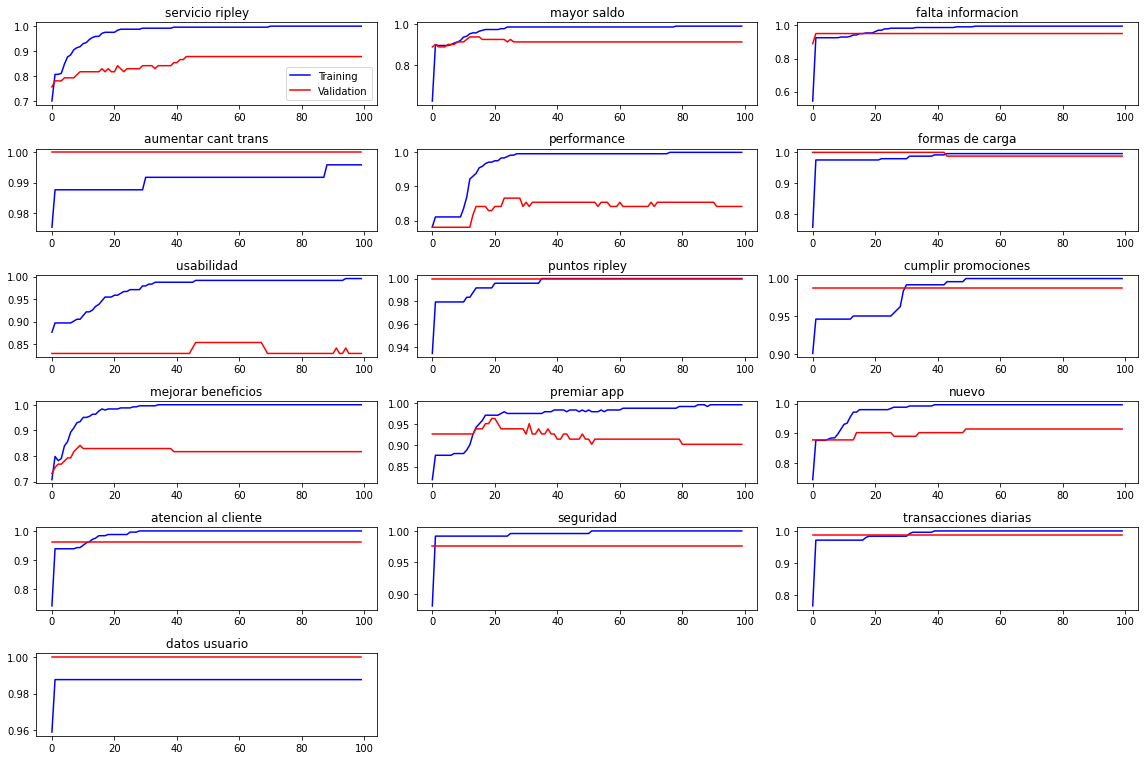

In [35]:
import matplotlib.pyplot as plt
import numpy as np

nPlots = len(exp)
 
def singleHistory(axs,hist,name,useLegend=False):
    xPos = range(len(hist.history['acc']))
    axs.plot(xPos, hist.history['acc'], 'b', label='Training')
    axs.plot(xPos, hist.history['val_acc'], 'r', label='Validation')
    axs.set_title(name)
    if useLegend:
        axs.legend()

fig, axs = plt.subplots(int(np.ceil(nPlots/3)),3,figsize=(16,2*nPlots/3))

for i,e in enumerate(exp):
    singleHistory(axs[int(i/3)][i%3],e['history'],e['exp'],useLegend=(i==0))
        
fig.delaxes(axs[-1][1])
fig.delaxes(axs[-1][-1])
plt.tight_layout()